In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from importlib import reload
import betheBloch_library as bbl

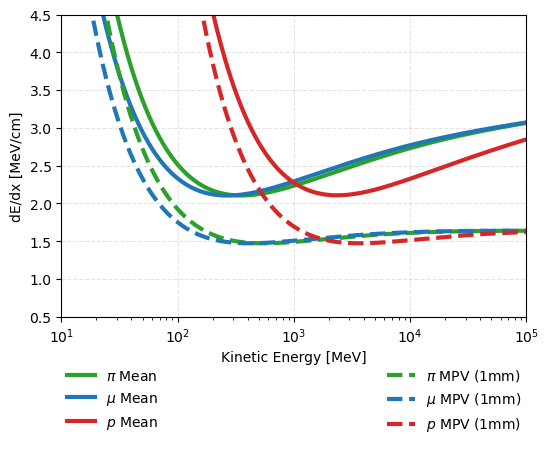

In [18]:
reload(bbl)

bb_pi_x, bb_pi_y = bbl.BetheBlochCurve(139.5)
bb_mu_x, bb_mu_y = bbl.BetheBlochCurve(105.65)
bb_p_x, bb_p_y = bbl.BetheBlochCurve(938.27)

lan_pi_x, lan_pi_y = bbl.LandauCurve(139.5,0.1)
lan_mu_x, lan_mu_y = bbl.LandauCurve(105.65,0.1)
lan_p_x, lan_p_y = bbl.LandauCurve(938.27,0.1)

plt.figure(figsize=(6,4),facecolor='white',dpi=100)
plt.plot(bb_pi_x,bb_pi_y,color='C2',lw=3,label='$\pi$ Mean')
plt.plot(bb_mu_x,bb_mu_y,color='C0',lw=3,label='$\mu$ Mean')
plt.plot(bb_p_x,bb_p_y,color='C3',lw=3,label='$p$ Mean')
plt.plot(lan_pi_x,lan_pi_y,color='C2',ls='--',lw=3,label='$\pi$ MPV (1mm)')
plt.plot(lan_mu_x,lan_mu_y,color='C0',ls='--',lw=3,label='$\mu$ MPV (1mm)')
plt.plot(lan_p_x,lan_p_y,color='C3',ls='--',lw=3,label='$p$ MPV (1mm)')
plt.grid(ls='--',color='gray',alpha=0.2)
plt.xscale('log')
plt.xlim(10,1e5)
plt.ylim(0.5,4.5)
plt.xlabel('Kinetic Energy [MeV]')
plt.ylabel('dE/dx [MeV/cm]')
plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0, frameon=False)
plt.show()

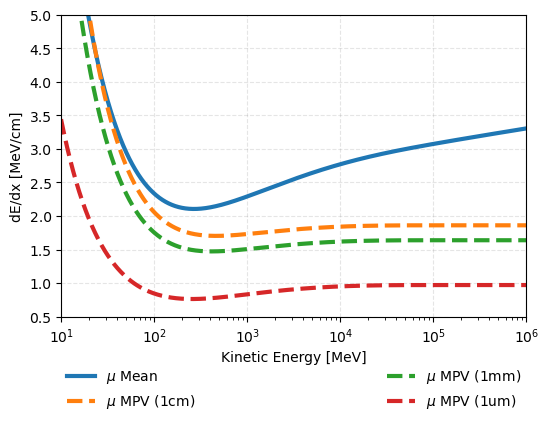

In [26]:
# YOU NEED TO UNCOMMENT SILICON CONSTANTS IN THE LIBRARY TO MAKE THIS PLOT
reload(bbl)
tab_sil = pd.read_csv('Tabulated/silicon.txt',delimiter=' ')
tab_lar = pd.read_csv('Tabulated/lar.txt',delimiter=' ')

rho = 2.329  # g/cm3 (silicon density)
bb_mu_x, bb_mu_y = bbl.BetheBlochCurve(105.65)

lan_mu1_x, lan_mu1_y = bbl.LandauCurve(105.65,1)
lan_mu2_x, lan_mu2_y = bbl.LandauCurve(105.65,1e-1)
lan_mu3_x, lan_mu3_y = bbl.LandauCurve(105.65,1e-4)

# plt.figure(figsize=(6,4),facecolor='white',dpi=100)
# plt.plot(bb_mu_x,bb_mu_y/rho,color='C0',ls='-',lw=3,label='$\mu$ Mean')
# plt.plot(lan_mu1_x,lan_mu1_y/rho,color='C1',ls='--',lw=3,label='$\mu$ MPV (80um)')
# plt.plot(lan_mu2_x,lan_mu2_y/rho,color='C2',ls='--',lw=3,label='$\mu$ MPV (320um)')
# plt.plot(lan_mu3_x,lan_mu3_y/rho,color='C3',ls='--',lw=3,label='$\mu$ MPV (1600um)')

plt.figure(figsize=(6,4),facecolor='white',dpi=100)
plt.plot(bb_mu_x,bb_mu_y,color='C0',ls='-',lw=3,label='$\mu$ Mean')
plt.plot(lan_mu1_x,lan_mu1_y,color='C1',ls='--',lw=3,label='$\mu$ MPV (1cm)')
plt.plot(lan_mu2_x,lan_mu2_y,color='C2',ls='--',lw=3,label='$\mu$ MPV (1mm)')
plt.plot(lan_mu3_x,lan_mu3_y,color='C3',ls='--',lw=3,label='$\mu$ MPV (1um)')


plt.grid(ls='--',color='gray',alpha=0.2)
plt.xscale('log')
plt.xlim(10,1e6)
plt.ylim(0.5,5)
plt.xlabel('Kinetic Energy [MeV]')
# plt.ylabel('dE/dx [MeV cm$^2$/g]')
plt.ylabel('dE/dx [MeV/cm]')
plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0, frameon=False)
plt.show()

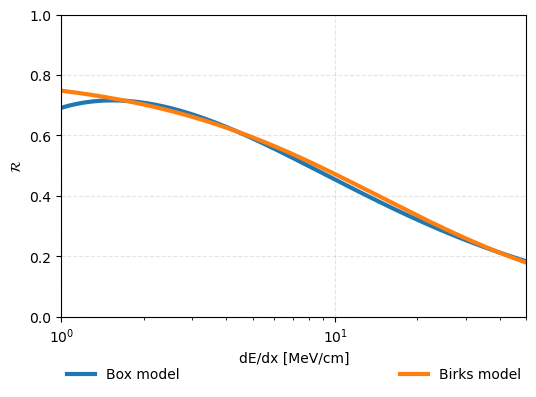

In [45]:
reload(bbl)
dedx = np.logspace(0,3,500)
box = [bbl.Recombination(e,model='box') for e in dedx]
birks = [bbl.Recombination(e,model='birks') for e in dedx]

plt.figure(figsize=(6,4),facecolor='white',dpi=100)
plt.plot(dedx,box,color='C0',lw=3,label='Box model')
plt.plot(dedx,birks,color='C1',lw=3,label='Birks model')
plt.grid(ls='--',color='gray',alpha=0.2)
plt.xlim(1,50)
plt.ylim(0,1)
plt.xscale('log')
plt.xlabel('dE/dx [MeV/cm]')
plt.ylabel('$\mathcal{R}$')
plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0, frameon=False)
plt.show()

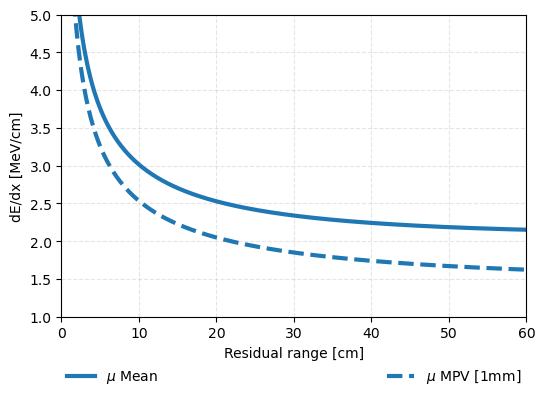

In [49]:
reload(bbl)

mean_dist, mean_dedx, mpv_dist, mpv_dedx = bbl.ResRange(105.65,0.1)

plt.figure(figsize=(6,4),facecolor='white',dpi=100)
plt.plot(mean_dist,mean_dedx,color='C0',lw=3,label='$\mu$ Mean')
plt.plot(mpv_dist,mpv_dedx,color='C0',ls='--',lw=3,label='$\mu$ MPV [1mm]')
plt.grid(ls='--',color='gray',alpha=0.2)
plt.xlim(0,60)
plt.ylim(1,5)
plt.xlabel('Residual range [cm]')
plt.ylabel('dE/dx [MeV/cm]')
plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0, frameon=False)
plt.show()

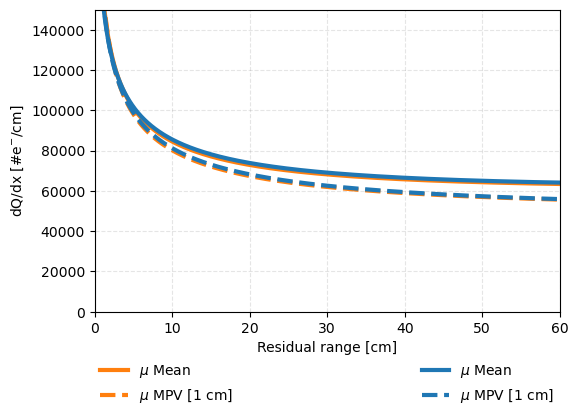

In [60]:
reload(bbl)

dl = 1
box_mean_dist, box_mean_dqdx, box_mpv_dist, box_mpv_dqdx = bbl.ResRange(105.65,dl,outType='dqdx',recModel='box')
birks_mean_dist, birks_mean_dqdx, birks_mpv_dist, birks_mpv_dqdx = bbl.ResRange(105.65,dl,outType='dqdx',recModel='birks')

plt.figure(figsize=(6,4),facecolor='white',dpi=100)
plt.plot(birks_mean_dist,birks_mean_dqdx,color='C1',lw=3,label='$\mu$ Mean')
plt.plot(birks_mpv_dist,birks_mpv_dqdx,color='C1',ls='--',lw=3,label=f'$\mu$ MPV [{dl} cm]')
plt.plot(box_mean_dist,box_mean_dqdx,color='C0',lw=3,label='$\mu$ Mean')
plt.plot(box_mpv_dist,box_mpv_dqdx,color='C0',ls='--',lw=3,label=f'$\mu$ MPV [{dl} cm]')
plt.grid(ls='--',color='gray',alpha=0.2)
plt.xlim(0,60)
plt.ylim(0,150e3)
plt.xlabel('Residual range [cm]')
plt.ylabel('dQ/dx [#e$^{-}$/cm]')
plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0, frameon=False)
plt.show()





/home/dporzio/.conda/envs/ana/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:623: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/dporzio/.conda/envs/ana/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:626: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


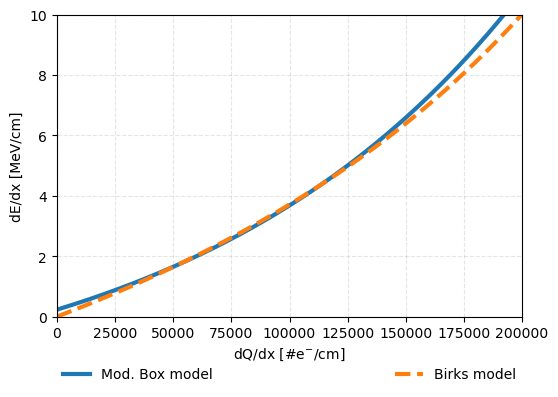

In [62]:
reload(bbl)

dqdx = np.linspace(0,250e3,int(1e4))
box_dedx = bbl.ConvertQtoE(dqdx,model='box')
birks_dedx = bbl.ConvertQtoE(dqdx,model='birks')

plt.figure(figsize=(6,4),facecolor='white',dpi=100)
plt.plot(dqdx,box_dedx,color='C0',lw=3,label='Mod. Box model')
plt.plot(dqdx,birks_dedx,color='C1',ls='--',lw=3,label=f'Birks model')

plt.grid(ls='--',color='gray',alpha=0.2)
plt.xlim(0,200e3)
plt.ylim(0,10)
plt.xlabel('dQ/dx [#e$^{-}$/cm]')
plt.ylabel('dE/dx [MeV/cm]')
plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0, frameon=False)
plt.show()